# PROBLEM - 1

### A University would like to effectively classify their students based on the program they are enrolled in. Perform multinomial regression on the given dataset and provide insights (in the documentation).

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [3]:
mdata = pd.read_csv(r"D:\360 Data Science 360DigiTMG\Day34-Multinomial Regression\Datasets_Multinomial\mdata.csv")

In [4]:
mdata.head(10)

Unnamed: 0   id  female     ses  schtyp      prog  read  write  math  \
0           1   45  female     low  public  vocation    34     35    41   
1           2  108    male  middle  public   general    34     33    41   
2           3   15    male    high  public  vocation    39     39    44   
3           4   67    male     low  public  vocation    37     37    42   
4           5  153    male  middle  public  vocation    39     31    40   
5           6   51  female    high  public   general    42     36    42   
6           7  164    male  middle  public  vocation    31     36    46   
7           8  133    male  middle  public  vocation    50     31    40   
8           9    2  female  middle  public  vocation    39     41    33   
9          10   53    male  middle  public  vocation    34     37    46   

   science        honors  
0       29  not enrolled  
1       36  not enrolled  
2       26  not enrolled  
3       33  not enrolled  
4       39  not enrolled  
5       31  not enrolled  
6       39  not enrolled  
7       34  not enrolled  
8       42  not enrolled  
9       39  not enrolled

In [5]:
mdata.columns

Index(['Unnamed: 0', 'id', 'female', 'ses', 'schtyp', 'prog', 'read', 'write',
       'math', 'science', 'honors'],
      dtype='object')

In [6]:
mdata.honors.value_counts()

not enrolled    147
enrolled         53
Name: honors, dtype: int64

In [7]:
mdata.describe()

Unnamed: 0          id        read       write        math     science
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  100.500000   52.230000   52.775000   52.645000   51.850000
std     57.879185   57.879185   10.252937    9.478586    9.368448    9.900891
min      1.000000    1.000000   28.000000   31.000000   33.000000   26.000000
25%     50.750000   50.750000   44.000000   45.750000   45.000000   44.000000
50%    100.500000  100.500000   50.000000   54.000000   52.000000   53.000000
75%    150.250000  150.250000   60.000000   60.000000   59.000000   58.000000
max    200.000000  200.000000   76.000000   67.000000   75.000000   74.000000

In [8]:
mdata.dtypes

Unnamed: 0     int64
id             int64
female        object
ses           object
schtyp        object
prog          object
read           int64
write          int64
math           int64
science        int64
honors        object
dtype: object

In [9]:
#EDA
mdata = mdata.iloc[:,1:]

In [10]:
#Label_Encoding
label_encoder = preprocessing.LabelEncoder()
mdata['ses'] = label_encoder.fit_transform(mdata['ses'] )
mdata['schtyp'] = label_encoder.fit_transform(mdata['schtyp'] )
mdata['honors'] = label_encoder.fit_transform(mdata['honors'] )
mdata['female'] = label_encoder.fit_transform(mdata['female'] )

In [11]:
mdata.dtypes

id          int64
female      int32
ses         int32
schtyp      int32
prog       object
read        int64
write       int64
math        int64
science     int64
honors      int32
dtype: object

<AxesSubplot: xlabel='prog', ylabel='ses'>

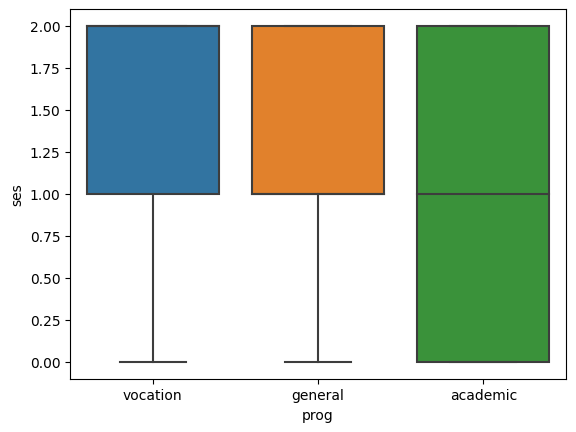

In [12]:
# Boxplot of independent variable distribution for each category of choice 
sns.boxplot(x = "prog", y = "ses", data = mdata)

<AxesSubplot: xlabel='prog', ylabel='schtyp'>

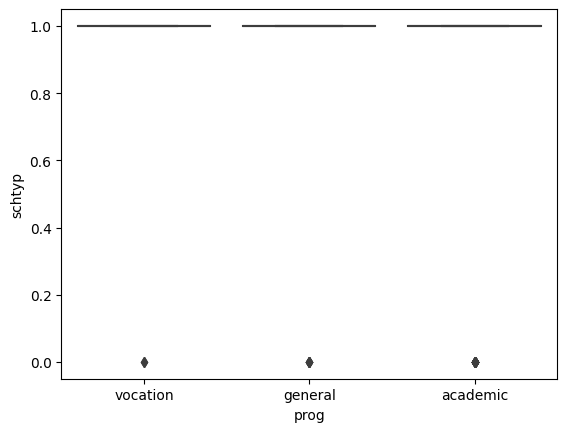

In [13]:
sns.boxplot(x = "prog", y = "schtyp", data = mdata)

<AxesSubplot: xlabel='prog', ylabel='honors'>

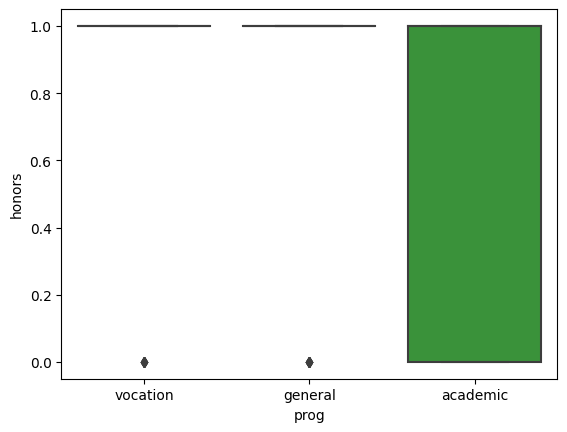

In [14]:
sns.boxplot(x = "prog", y = "honors", data = mdata)

<AxesSubplot: xlabel='prog', ylabel='read'>

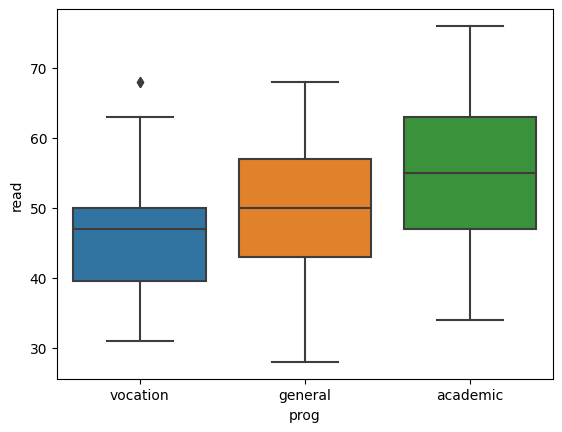

In [15]:
sns.boxplot(x = "prog", y = "read", data = mdata)

<AxesSubplot: xlabel='prog', ylabel='write'>

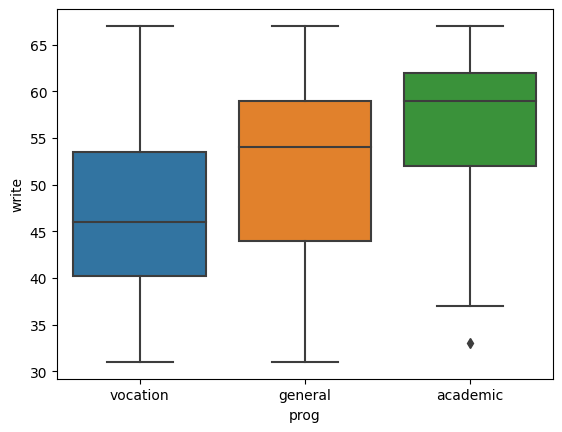

In [16]:
sns.boxplot(x = "prog", y = "write", data = mdata)

<AxesSubplot: xlabel='prog', ylabel='math'>

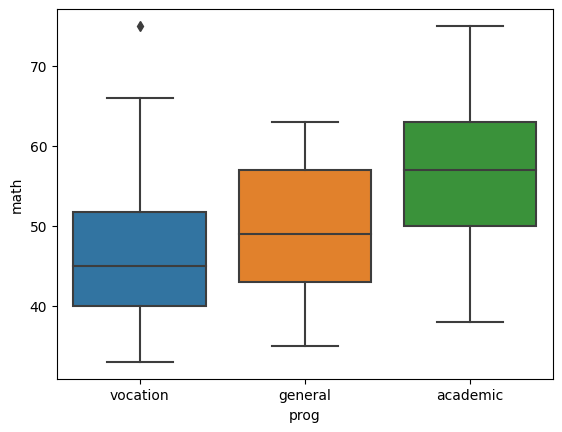

In [17]:
sns.boxplot(x = "prog", y = "math", data = mdata)

<AxesSubplot: xlabel='prog', ylabel='science'>

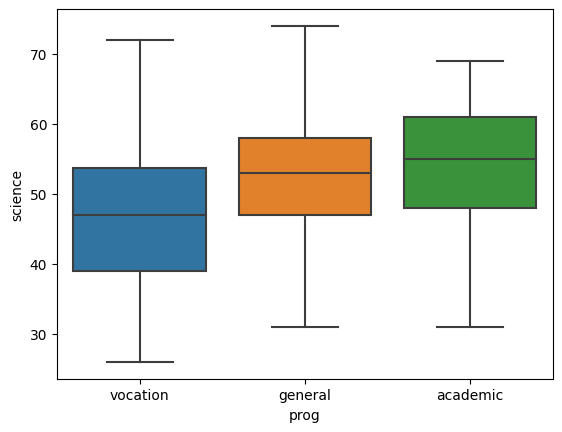

In [18]:
sns.boxplot(x = "prog", y = "science", data = mdata)

<AxesSubplot: xlabel='prog', ylabel='female'>

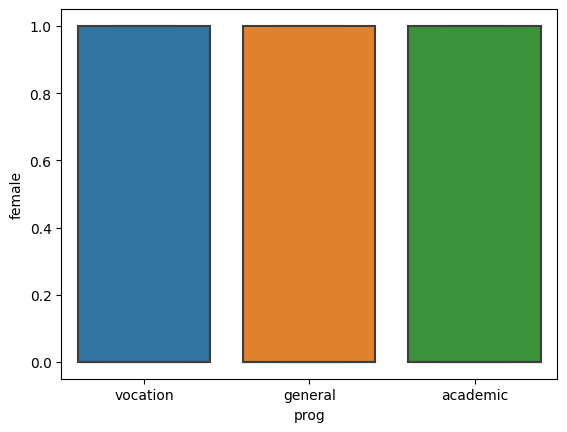

In [19]:
sns.boxplot(x = "prog", y = "female", data = mdata)

<AxesSubplot: xlabel='prog', ylabel='ses'>

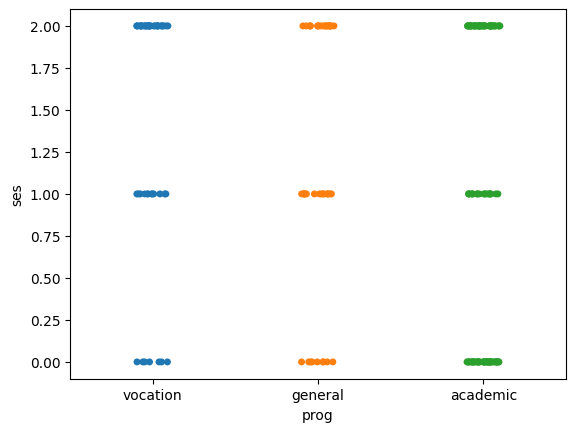

In [20]:
# Scatter plot for each categorical choice of car
sns.stripplot(x = "prog", y = "ses", jitter = True, data = mdata)

<AxesSubplot: xlabel='prog', ylabel='schtyp'>

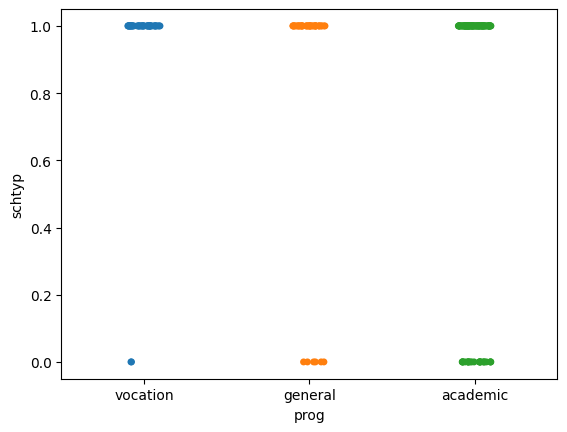

In [21]:
sns.stripplot(x = "prog", y = "schtyp", jitter = True, data = mdata)

<AxesSubplot: xlabel='prog', ylabel='honors'>

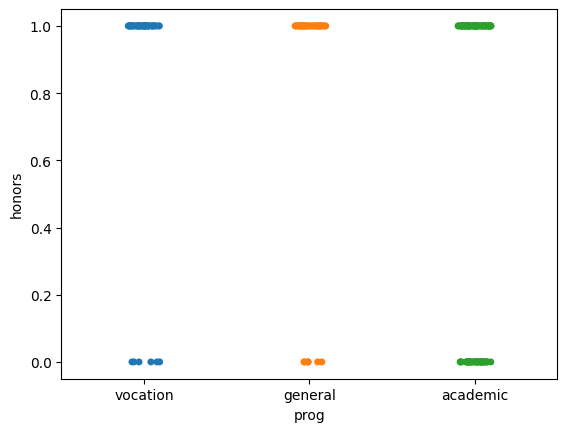

In [22]:
sns.stripplot(x = "prog", y = "honors", jitter = True, data = mdata)

<AxesSubplot: xlabel='prog', ylabel='read'>

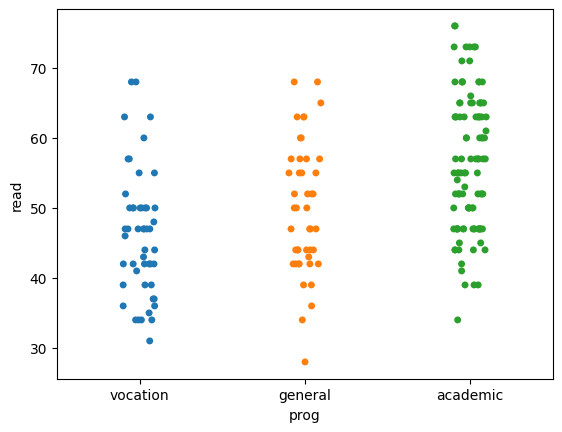

In [23]:
sns.stripplot(x = "prog", y = "read", jitter = True, data = mdata)

<AxesSubplot: xlabel='prog', ylabel='write'>

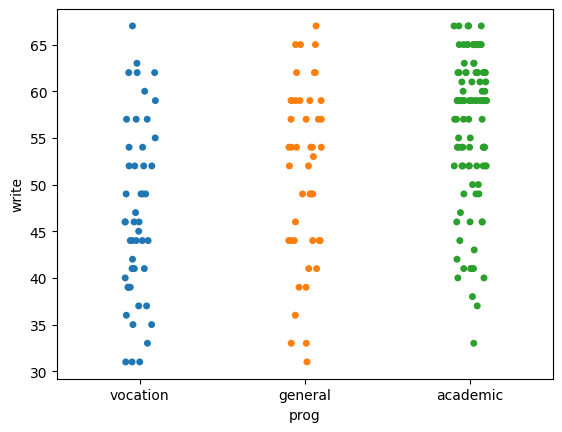

In [24]:
sns.stripplot(x = "prog", y = "write", jitter = True, data = mdata)

<AxesSubplot: xlabel='prog', ylabel='math'>

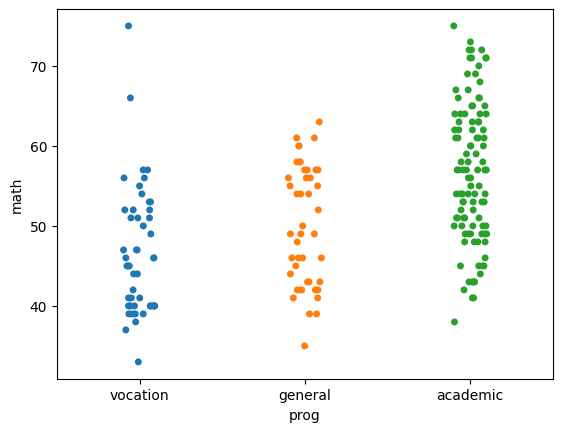

In [25]:
sns.stripplot(x = "prog", y = "math", jitter = True, data = mdata)

<AxesSubplot: xlabel='prog', ylabel='science'>

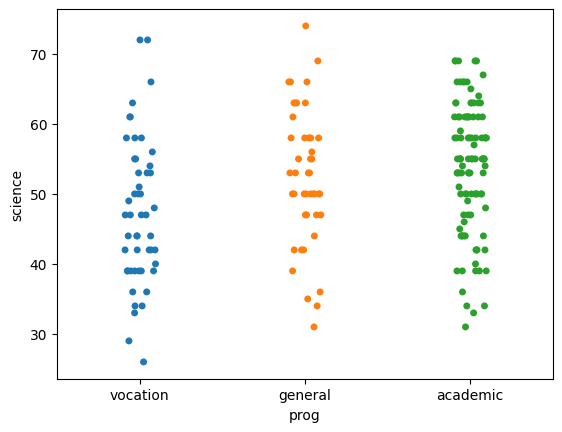

In [26]:
sns.stripplot(x = "prog", y = "science", jitter = True, data = mdata)

<AxesSubplot: xlabel='prog', ylabel='female'>

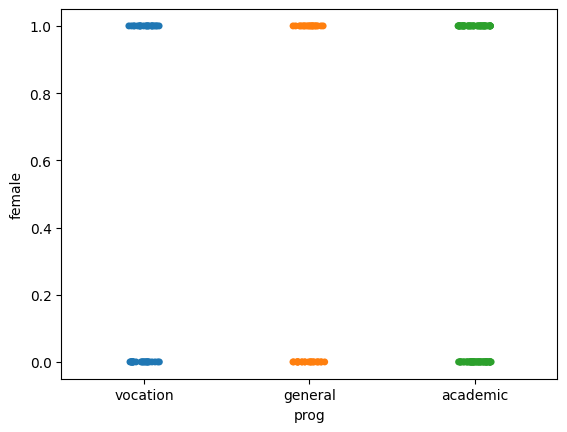

In [27]:
sns.stripplot(x = "prog", y = "female", jitter = True, data = mdata)

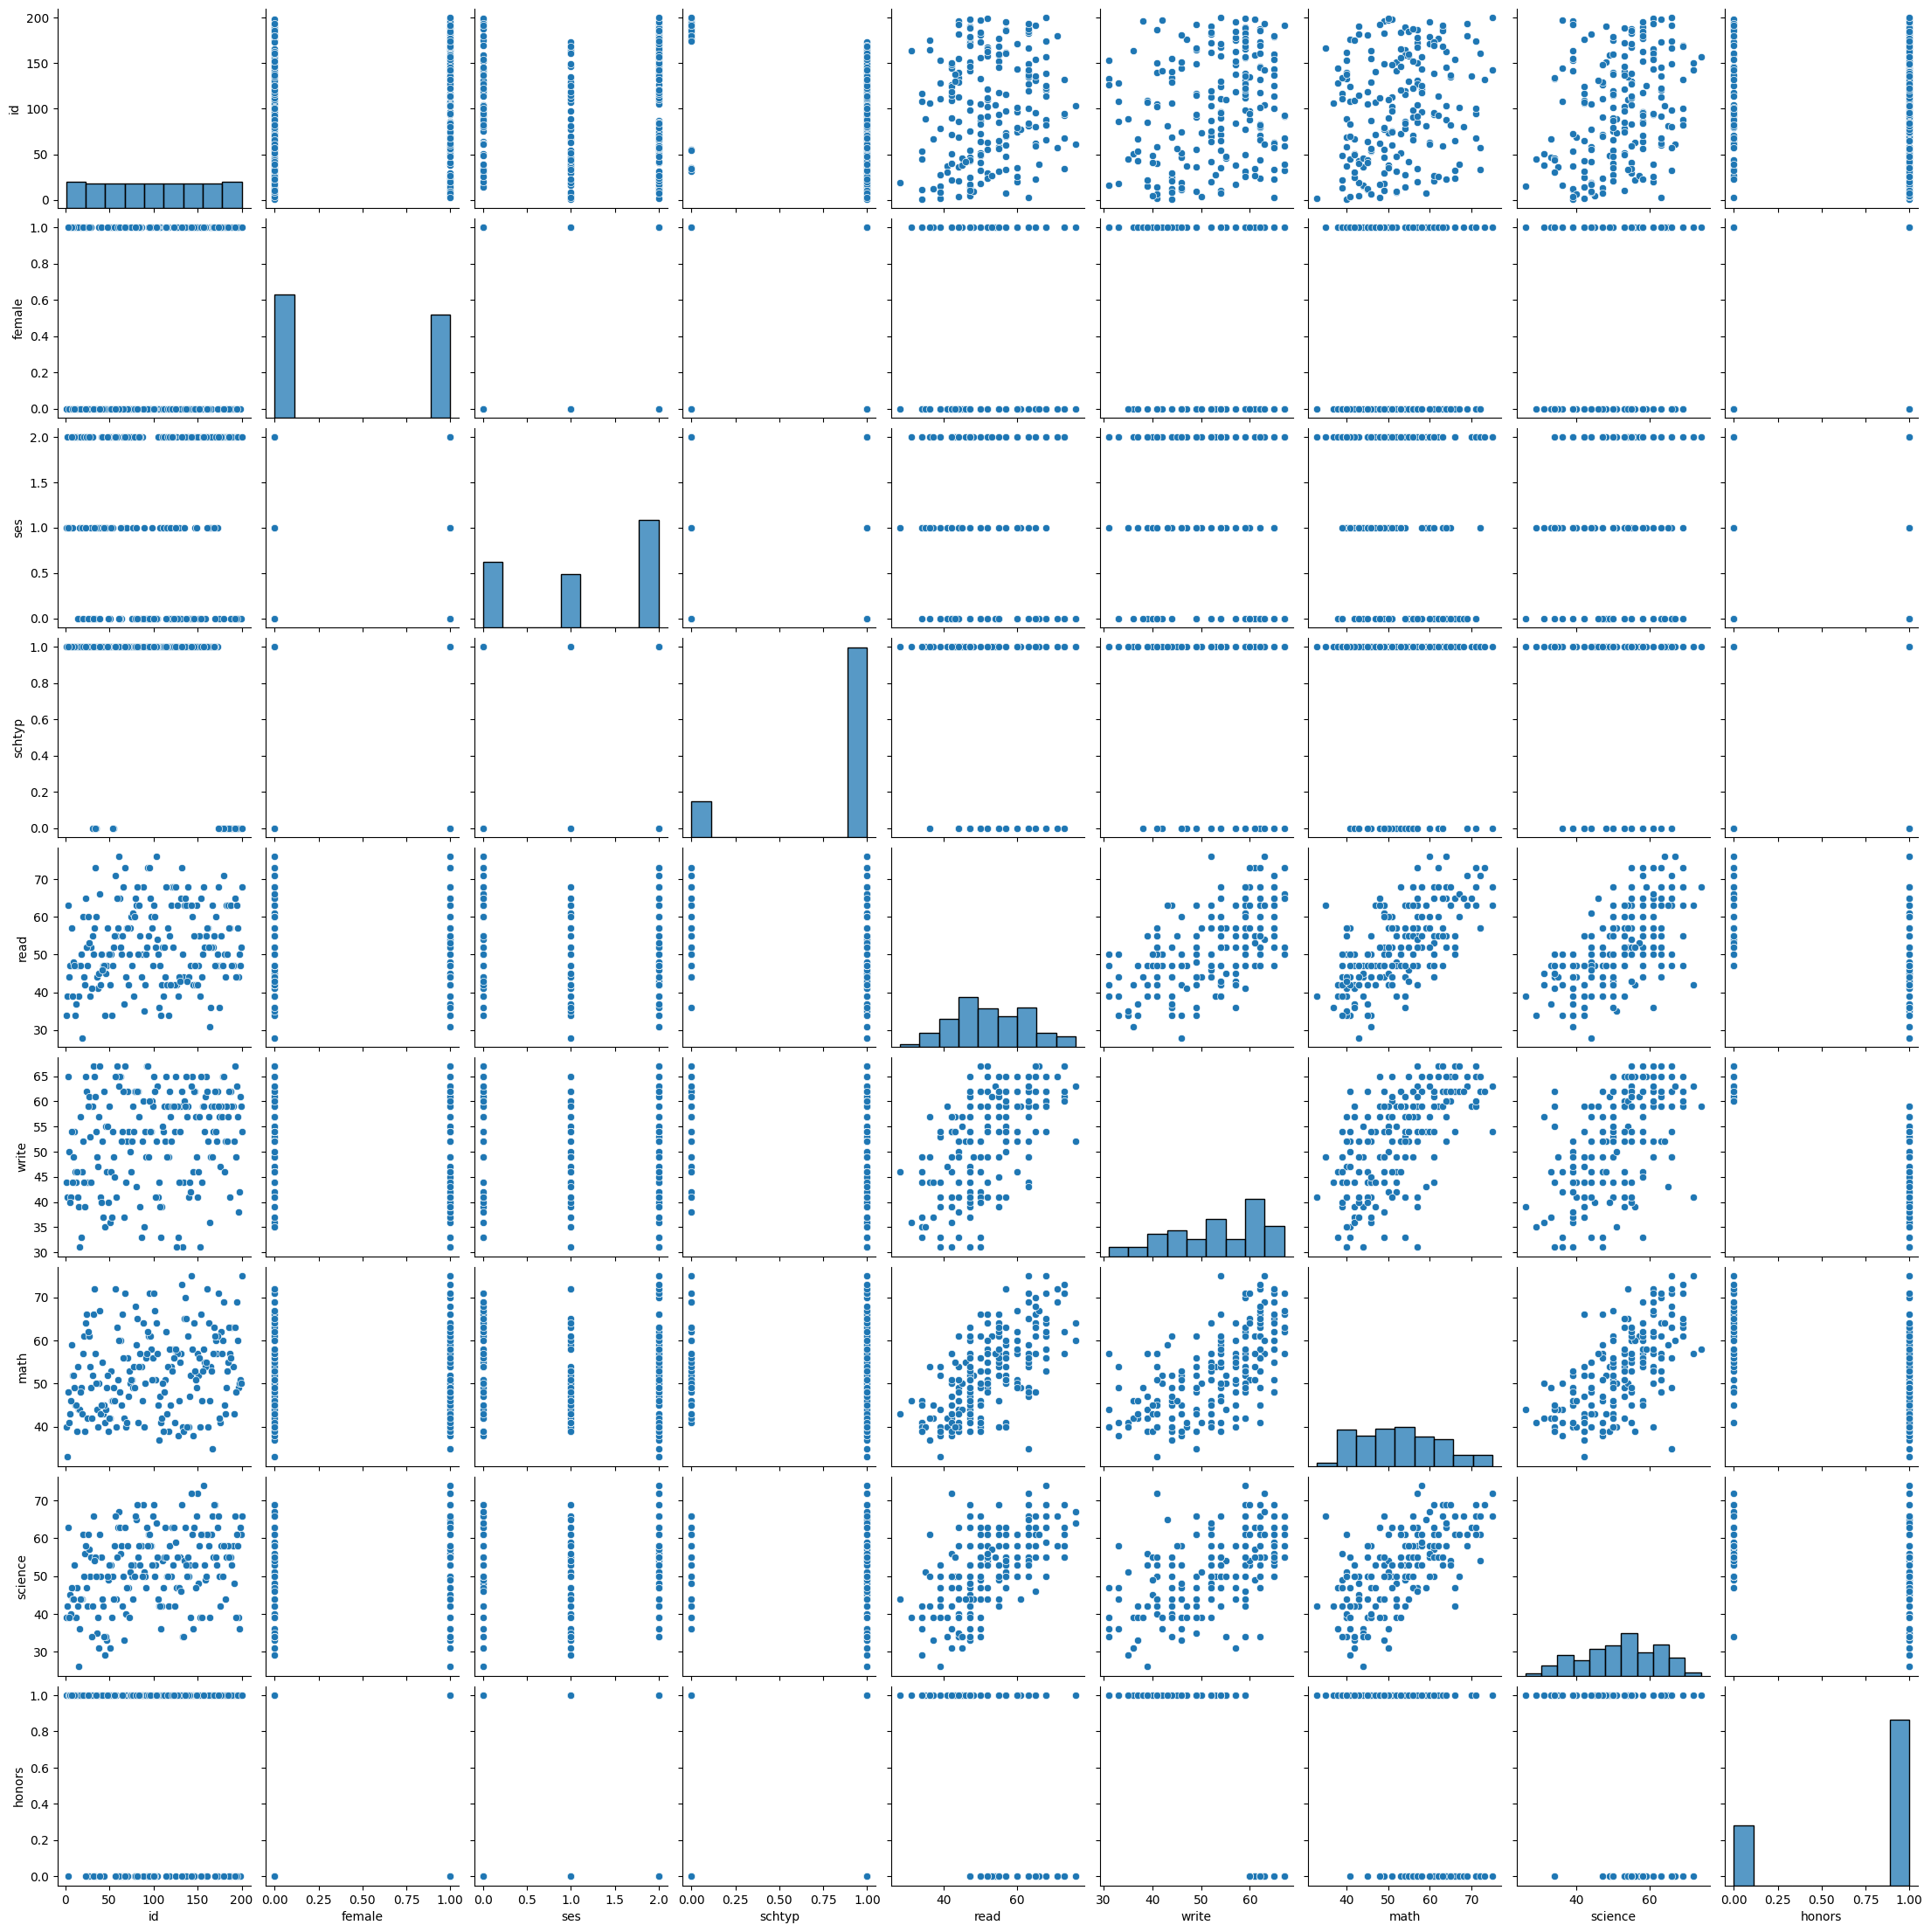

In [28]:
# Scatter plot between each possible pair of independent variable and also histogram for each independent variable 
sns.pairplot(mdata) # Normal

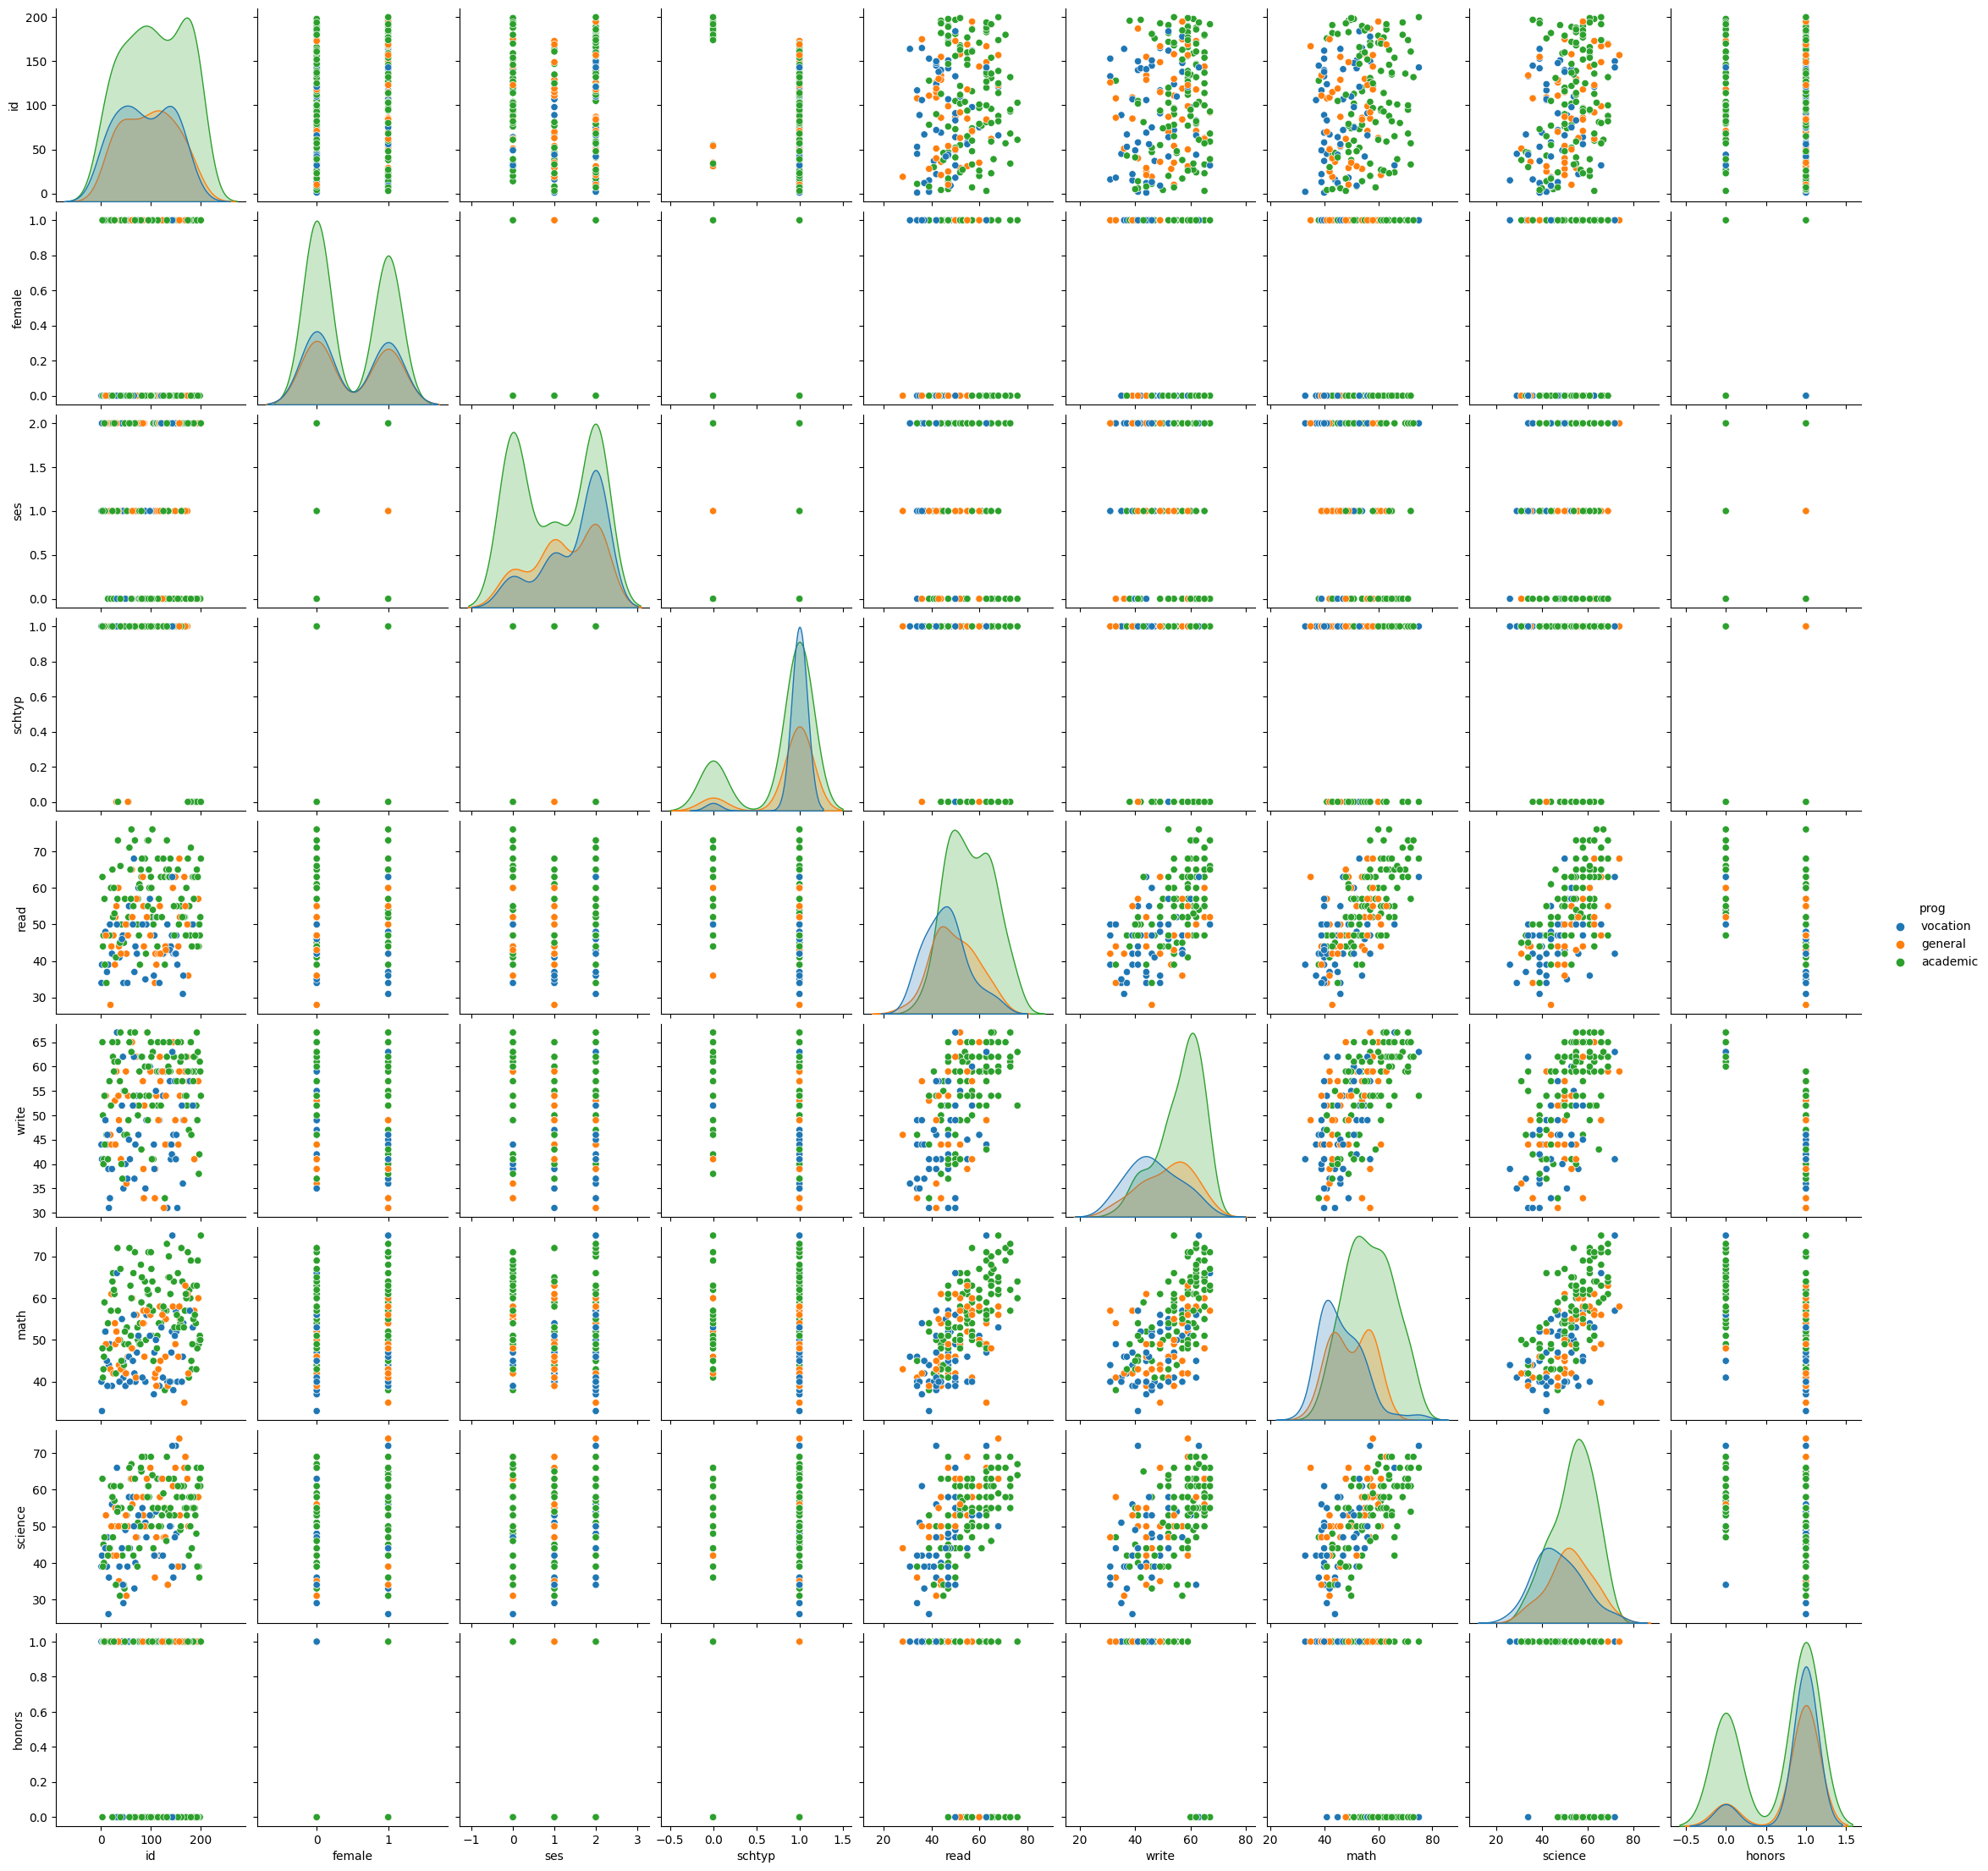

In [29]:
sns.pairplot(mdata, hue = "prog") # With showing type of the program students choosed  in the scatter plot

In [30]:
# Correlation values between each independent features
mdata.corr()

id    female       ses    schtyp      read     write      math  \
id       1.000000  0.087217  0.014132 -0.482383  0.148620  0.186688  0.219234   
female   0.087217  1.000000  0.013684  0.015337  0.053084 -0.256492  0.029338   
ses      0.014132  0.013684  1.000000 -0.033185 -0.177008 -0.162496 -0.153885   
schtyp  -0.482383  0.015337 -0.033185  1.000000 -0.086201 -0.127228 -0.098309   
read     0.148620  0.053084 -0.177008 -0.086201  1.000000  0.596776  0.662280   
write    0.186688 -0.256492 -0.162496 -0.127228  0.596776  1.000000  0.617449   
math     0.219234  0.029338 -0.153885 -0.098309  0.662280  0.617449  1.000000   
science  0.321402  0.127745 -0.131742 -0.064629  0.630158  0.570442  0.630733   
honors  -0.045035  0.139122  0.262474 -0.014834 -0.489417 -0.675724 -0.541691   

          science    honors  
id       0.321402 -0.045035  
female   0.127745  0.139122  
ses     -0.131742  0.262474  
schtyp  -0.064629 -0.014834  
read     0.630158 -0.489417  
write    0.570442 -0.675724  
math     0.630733 -0.541691  
science  1.000000 -0.417503  
honors  -0.417503  1.000000

In [31]:
train, test = train_test_split(mdata, test_size = 0.2)

In [32]:
# ‘multinomial’ option is supported only by the ‘lbfgs’ and ‘newton-cg’ solvers
model = LogisticRegression(multi_class = "multinomial", solver = "newton-cg").fit(train.iloc[:,[0,1,2,3,5,6,7,8,9]], train.iloc[:, 4])
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

In [33]:
test_predict = model.predict(test.iloc[:, [0,1,2,3,5,6,7,8,9]]) # Test predictions

In [34]:
# Test accuracy 
accuracy_score(test.iloc[:,4], test_predict)

0.525

In [35]:
train_predict = model.predict(train.iloc[:, [0,1,2,3,5,6,7,8,9]]) # Train predictions 

In [36]:
# Train accuracy 
accuracy_score(train.iloc[:,4], train_predict) 

0.6375

# Problem - 2

In [37]:
#Multinomial Regression

In [38]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [40]:
loan = pd.read_csv(r"D:\360 Data Science 360DigiTMG\Day34-Multinomial Regression\Datasets_Multinomial\loan.csv")

C:\Users\J. Berger Perkins\AppData\Local\Temp\ipykernel_8036\563270989.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv(r"D:\360 Data Science 360DigiTMG\Day34-Multinomial Regression\Datasets_Multinomial\loan.csv")


In [41]:
#subsetting thr dataset
loan = loan.iloc[:,:17]

In [42]:
#Dropping unwanted columns
loan.drop(loan.iloc[:, [0,1,10,11,15]] , axis = 1 , inplace = True)

In [43]:
loan.head(10)

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0       5000         5000           4975.0   36 months   10.65%       162.87   
1       2500         2500           2500.0   60 months   15.27%        59.83   
2       2400         2400           2400.0   36 months   15.96%        84.33   
3      10000        10000          10000.0   36 months   13.49%       339.31   
4       3000         3000           3000.0   60 months   12.69%        67.79   
5       5000         5000           5000.0   36 months    7.90%       156.46   
6       7000         7000           7000.0   60 months   15.96%       170.08   
7       3000         3000           3000.0   36 months   18.64%       109.43   
8       5600         5600           5600.0   60 months   21.28%       152.39   
9       5375         5375           5350.0   60 months   12.69%       121.45   

  grade sub_grade home_ownership  annual_inc verification_status  loan_status  
0     B        B2           RENT     24000.0            Verified   Fully Paid  
1     C        C4           RENT     30000.0     Source Verified  Charged Off  
2     C        C5           RENT     12252.0        Not Verified   Fully Paid  
3     C        C1           RENT     49200.0     Source Verified   Fully Paid  
4     B        B5           RENT     80000.0     Source Verified      Current  
5     A        A4           RENT     36000.0     Source Verified   Fully Paid  
6     C        C5           RENT     47004.0        Not Verified   Fully Paid  
7     E        E1           RENT     48000.0     Source Verified   Fully Paid  
8     F        F2            OWN     40000.0     Source Verified  Charged Off  
9     B        B5           RENT     15000.0            Verified  Charged Off

In [44]:
#EDA
loan.describe()

loan_amnt   funded_amnt  funded_amnt_inv   installment    annual_inc
count  39717.000000  39717.000000     39717.000000  39717.000000  3.971700e+04
mean   11219.443815  10947.713196     10397.448868    324.561922  6.896893e+04
std     7456.670694   7187.238670      7128.450439    208.874874  6.379377e+04
min      500.000000    500.000000         0.000000     15.690000  4.000000e+03
25%     5500.000000   5400.000000      5000.000000    167.020000  4.040400e+04
50%    10000.000000   9600.000000      8975.000000    280.220000  5.900000e+04
75%    15000.000000  15000.000000     14400.000000    430.780000  8.230000e+04
max    35000.000000  35000.000000     35000.000000   1305.190000  6.000000e+06

In [45]:
loan.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [46]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status'],
      dtype='object')

In [47]:
#label encoding 
#converting into binary
lb = LabelEncoder()
loan["term"] = lb.fit_transform(loan["term"])
loan["grade"] = lb.fit_transform(loan["grade"])
loan["sub_grade"] = lb.fit_transform(loan["sub_grade"])
loan["home_ownership"] = lb.fit_transform(loan["home_ownership"])
loan["verification_status"] = lb.fit_transform(loan["verification_status"])

In [48]:
#converting percentage value to float for 'int_rate' column
loan['int_rate'] = loan['int_rate'].str.rstrip('%').astype(float)

<AxesSubplot: xlabel='loan_status', ylabel='loan_amnt'>

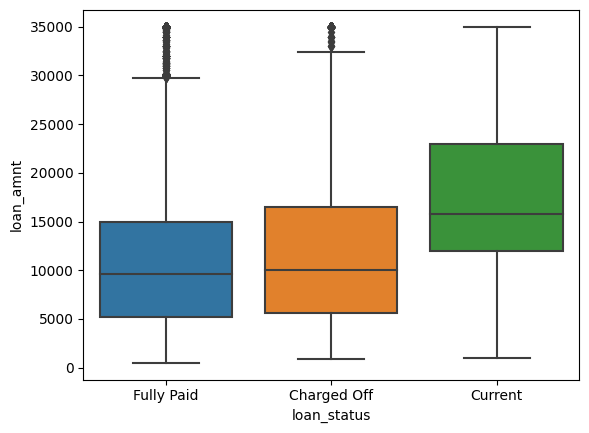

In [49]:
# Boxplot of independent variable distribution for each category of choice 
sns.boxplot(x = "loan_status", y = "loan_amnt", data = loan)

<AxesSubplot: xlabel='loan_status', ylabel='funded_amnt'>

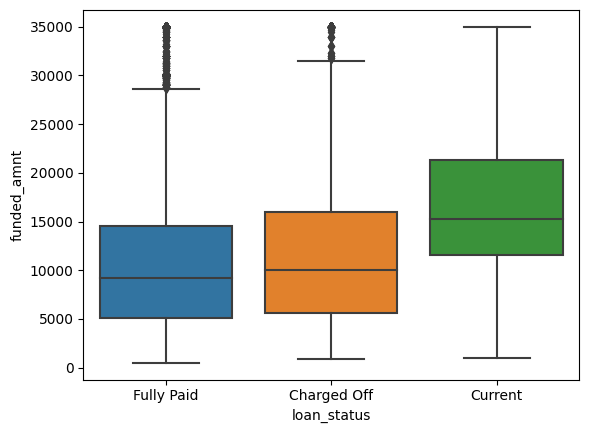

In [50]:
sns.boxplot(x = "loan_status", y = "funded_amnt", data = loan)

<AxesSubplot: xlabel='loan_status', ylabel='funded_amnt_inv'>

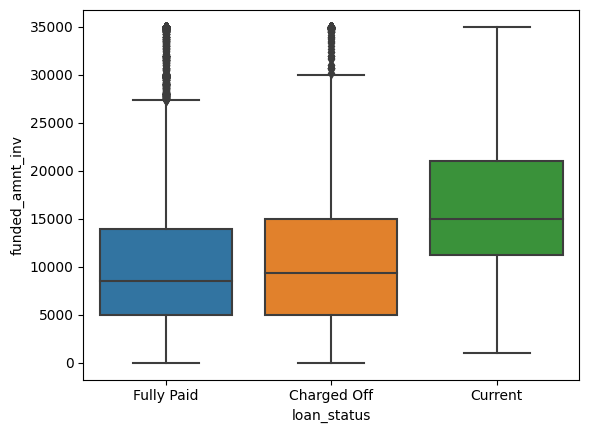

In [51]:
sns.boxplot(x = "loan_status", y = "funded_amnt_inv", data = loan)

<AxesSubplot: xlabel='loan_status', ylabel='term'>

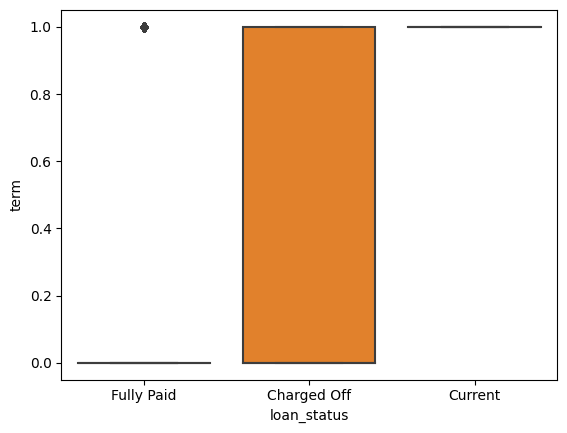

In [52]:
sns.boxplot(x = "loan_status", y = "term", data = loan)

<AxesSubplot: xlabel='loan_status', ylabel='int_rate'>

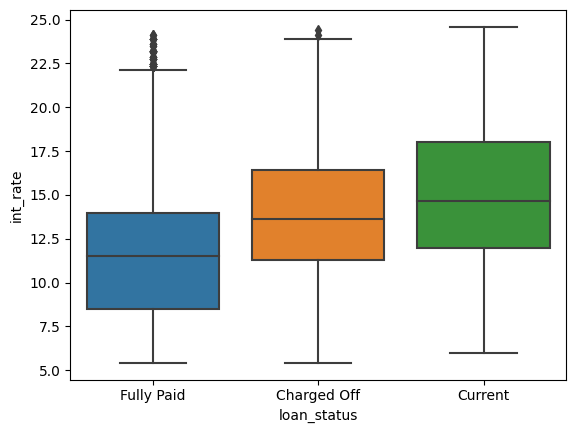

In [53]:
sns.boxplot(x = "loan_status", y = "int_rate", data = loan)

<AxesSubplot: xlabel='loan_status', ylabel='installment'>

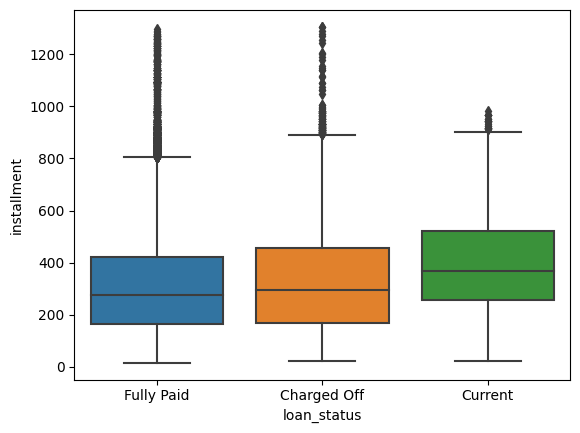

In [54]:
sns.boxplot(x = "loan_status", y = "installment", data = loan)

<AxesSubplot: xlabel='loan_status', ylabel='grade'>

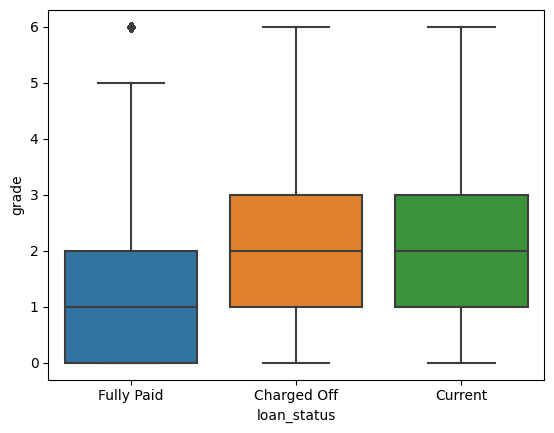

In [55]:
sns.boxplot(x = "loan_status", y = "grade", data = loan)

<AxesSubplot: xlabel='loan_status', ylabel='sub_grade'>

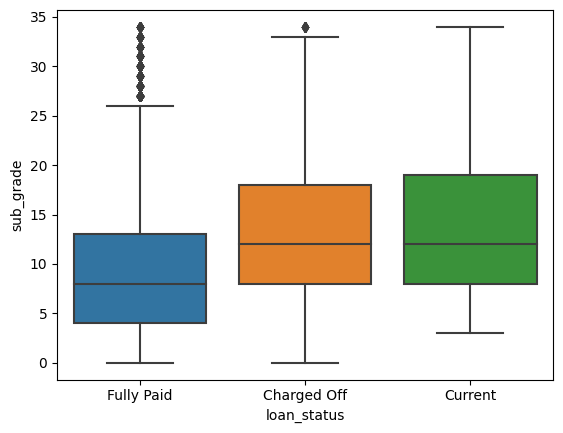

In [56]:
sns.boxplot(x = "loan_status", y = "sub_grade", data = loan)

<AxesSubplot: xlabel='loan_status', ylabel='home_ownership'>

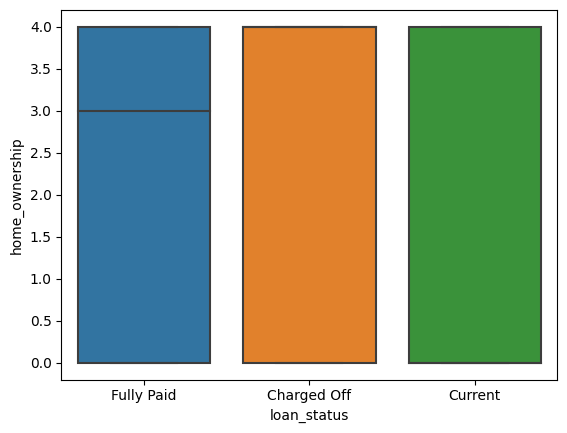

In [57]:
sns.boxplot(x = "loan_status", y = "home_ownership", data = loan)

<AxesSubplot: xlabel='loan_status', ylabel='annual_inc'>

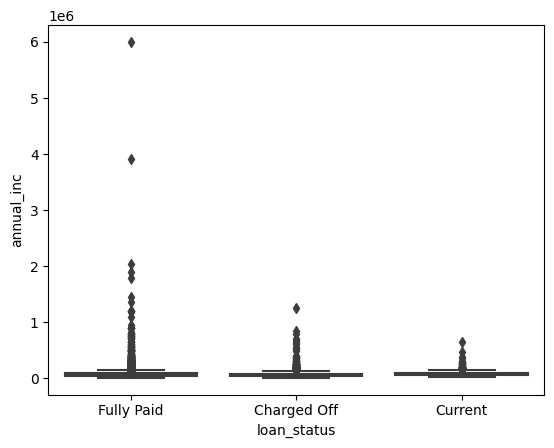

In [58]:
sns.boxplot(x = "loan_status", y = "annual_inc", data = loan)

<AxesSubplot: xlabel='loan_status', ylabel='verification_status'>

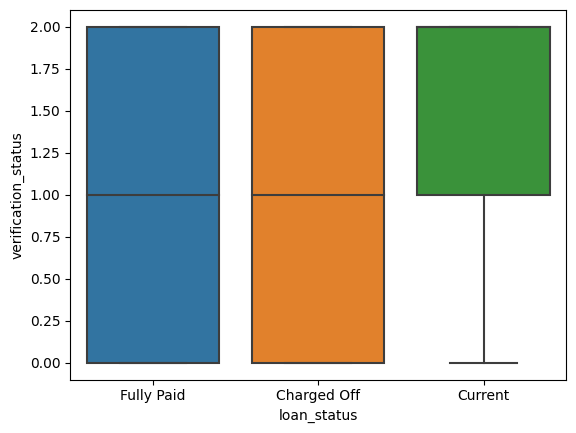

In [59]:
sns.boxplot(x = "loan_status", y = "verification_status", data = loan)

<AxesSubplot: xlabel='loan_status', ylabel='loan_amnt'>

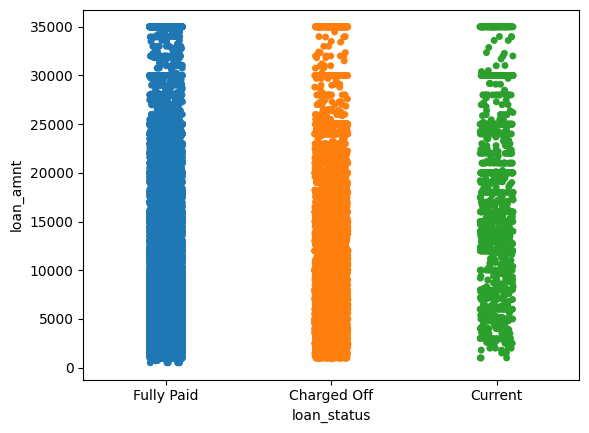

In [60]:
# Scatter plot for each categorical choice of car
sns.stripplot(x = "loan_status", y = "loan_amnt", jitter = True, data = loan)

<AxesSubplot: xlabel='loan_status', ylabel='funded_amnt'>

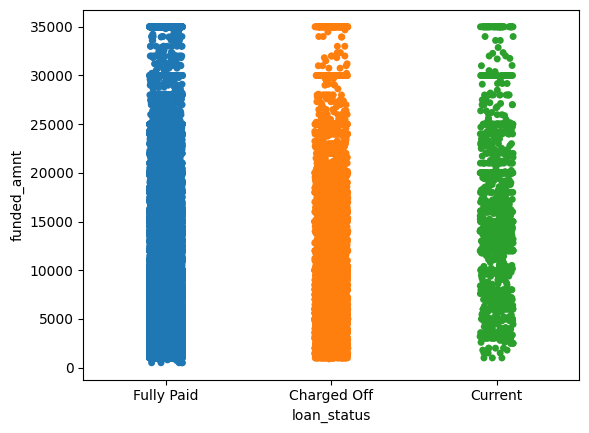

In [61]:
sns.stripplot(x = "loan_status", y = "funded_amnt", jitter = True, data = loan)

<AxesSubplot: xlabel='loan_status', ylabel='funded_amnt_inv'>

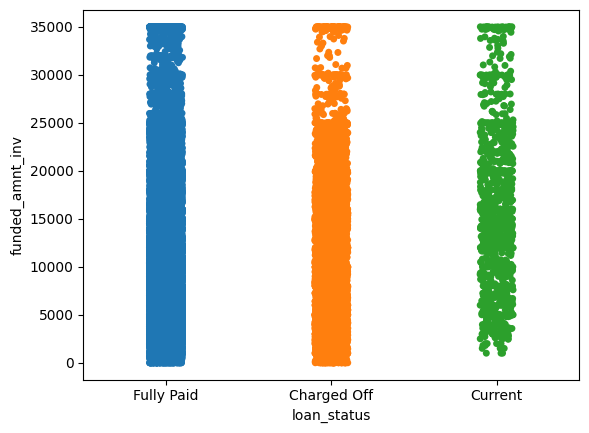

In [62]:
sns.stripplot(x = "loan_status", y = "funded_amnt_inv", jitter = True, data = loan)

<AxesSubplot: xlabel='loan_status', ylabel='term'>

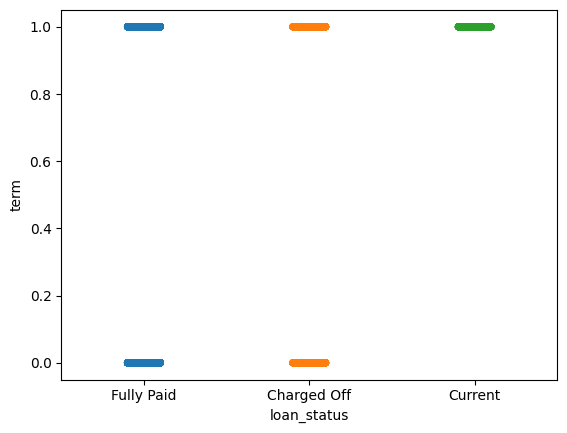

In [63]:
sns.stripplot(x = "loan_status", y = "term", jitter = True, data = loan)

<AxesSubplot: xlabel='loan_status', ylabel='int_rate'>

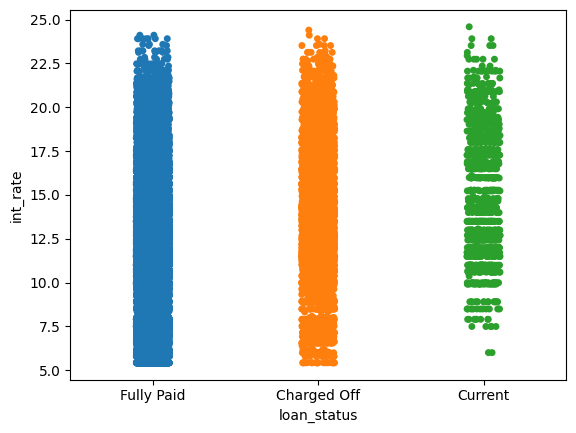

In [64]:
sns.stripplot(x = "loan_status", y = "int_rate", jitter = True, data = loan)

<AxesSubplot: xlabel='loan_status', ylabel='installment'>

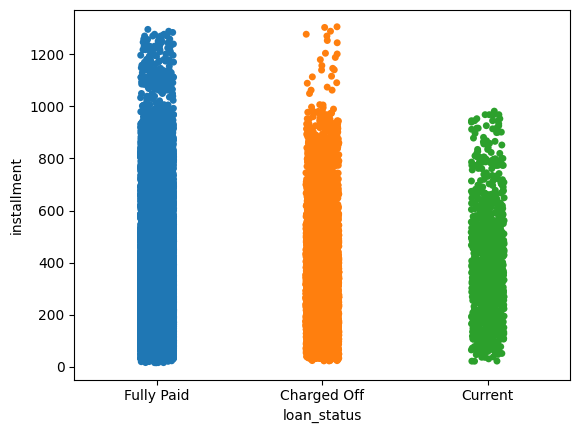

In [65]:
sns.stripplot(x = "loan_status", y = "installment", jitter = True, data = loan)

<AxesSubplot: xlabel='loan_status', ylabel='grade'>

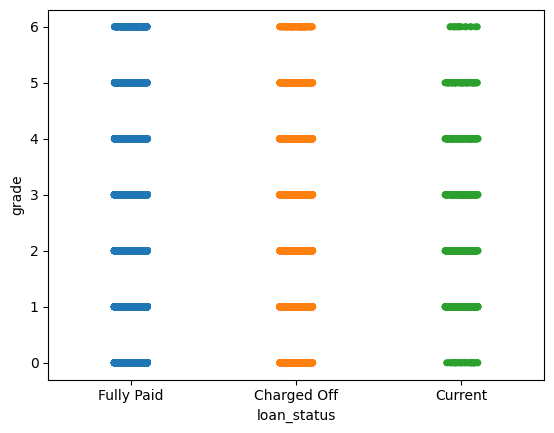

In [66]:
sns.stripplot(x = "loan_status", y = "grade", jitter = True, data = loan)

<AxesSubplot: xlabel='loan_status', ylabel='sub_grade'>

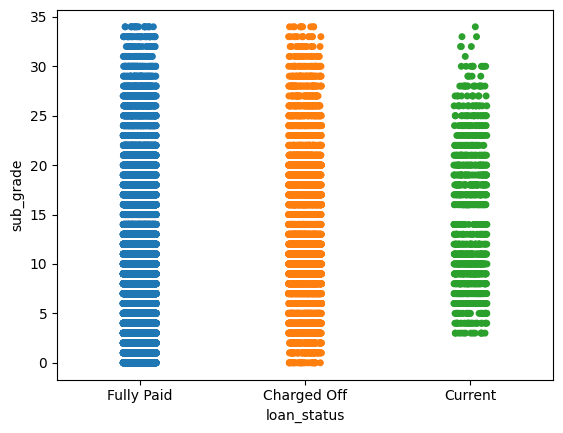

In [67]:
sns.stripplot(x = "loan_status", y = "sub_grade", jitter = True, data = loan)

<AxesSubplot: xlabel='loan_status', ylabel='home_ownership'>

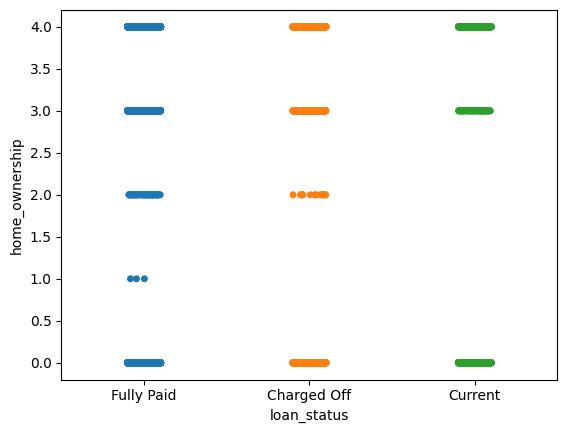

In [68]:
sns.stripplot(x = "loan_status", y = "home_ownership", jitter = True, data = loan)

<AxesSubplot: xlabel='loan_status', ylabel='annual_inc'>

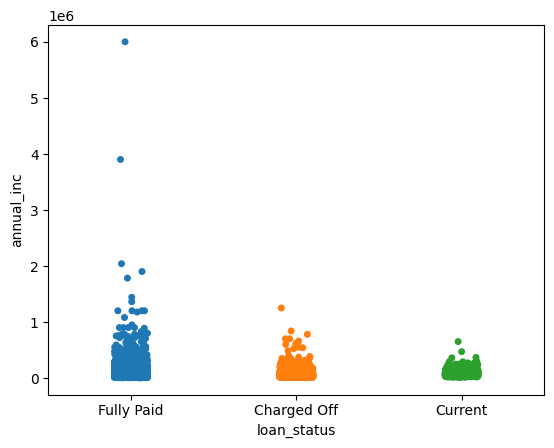

In [69]:
sns.stripplot(x = "loan_status", y = "annual_inc", jitter = True, data = loan)

<AxesSubplot: xlabel='loan_status', ylabel='verification_status'>

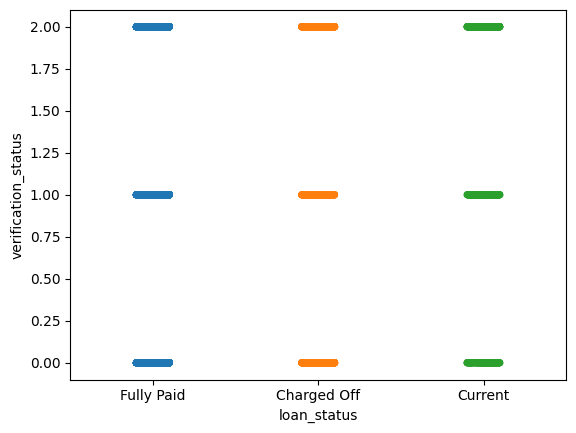

In [70]:
sns.stripplot(x = "loan_status", y = "verification_status", jitter = True, data = loan)

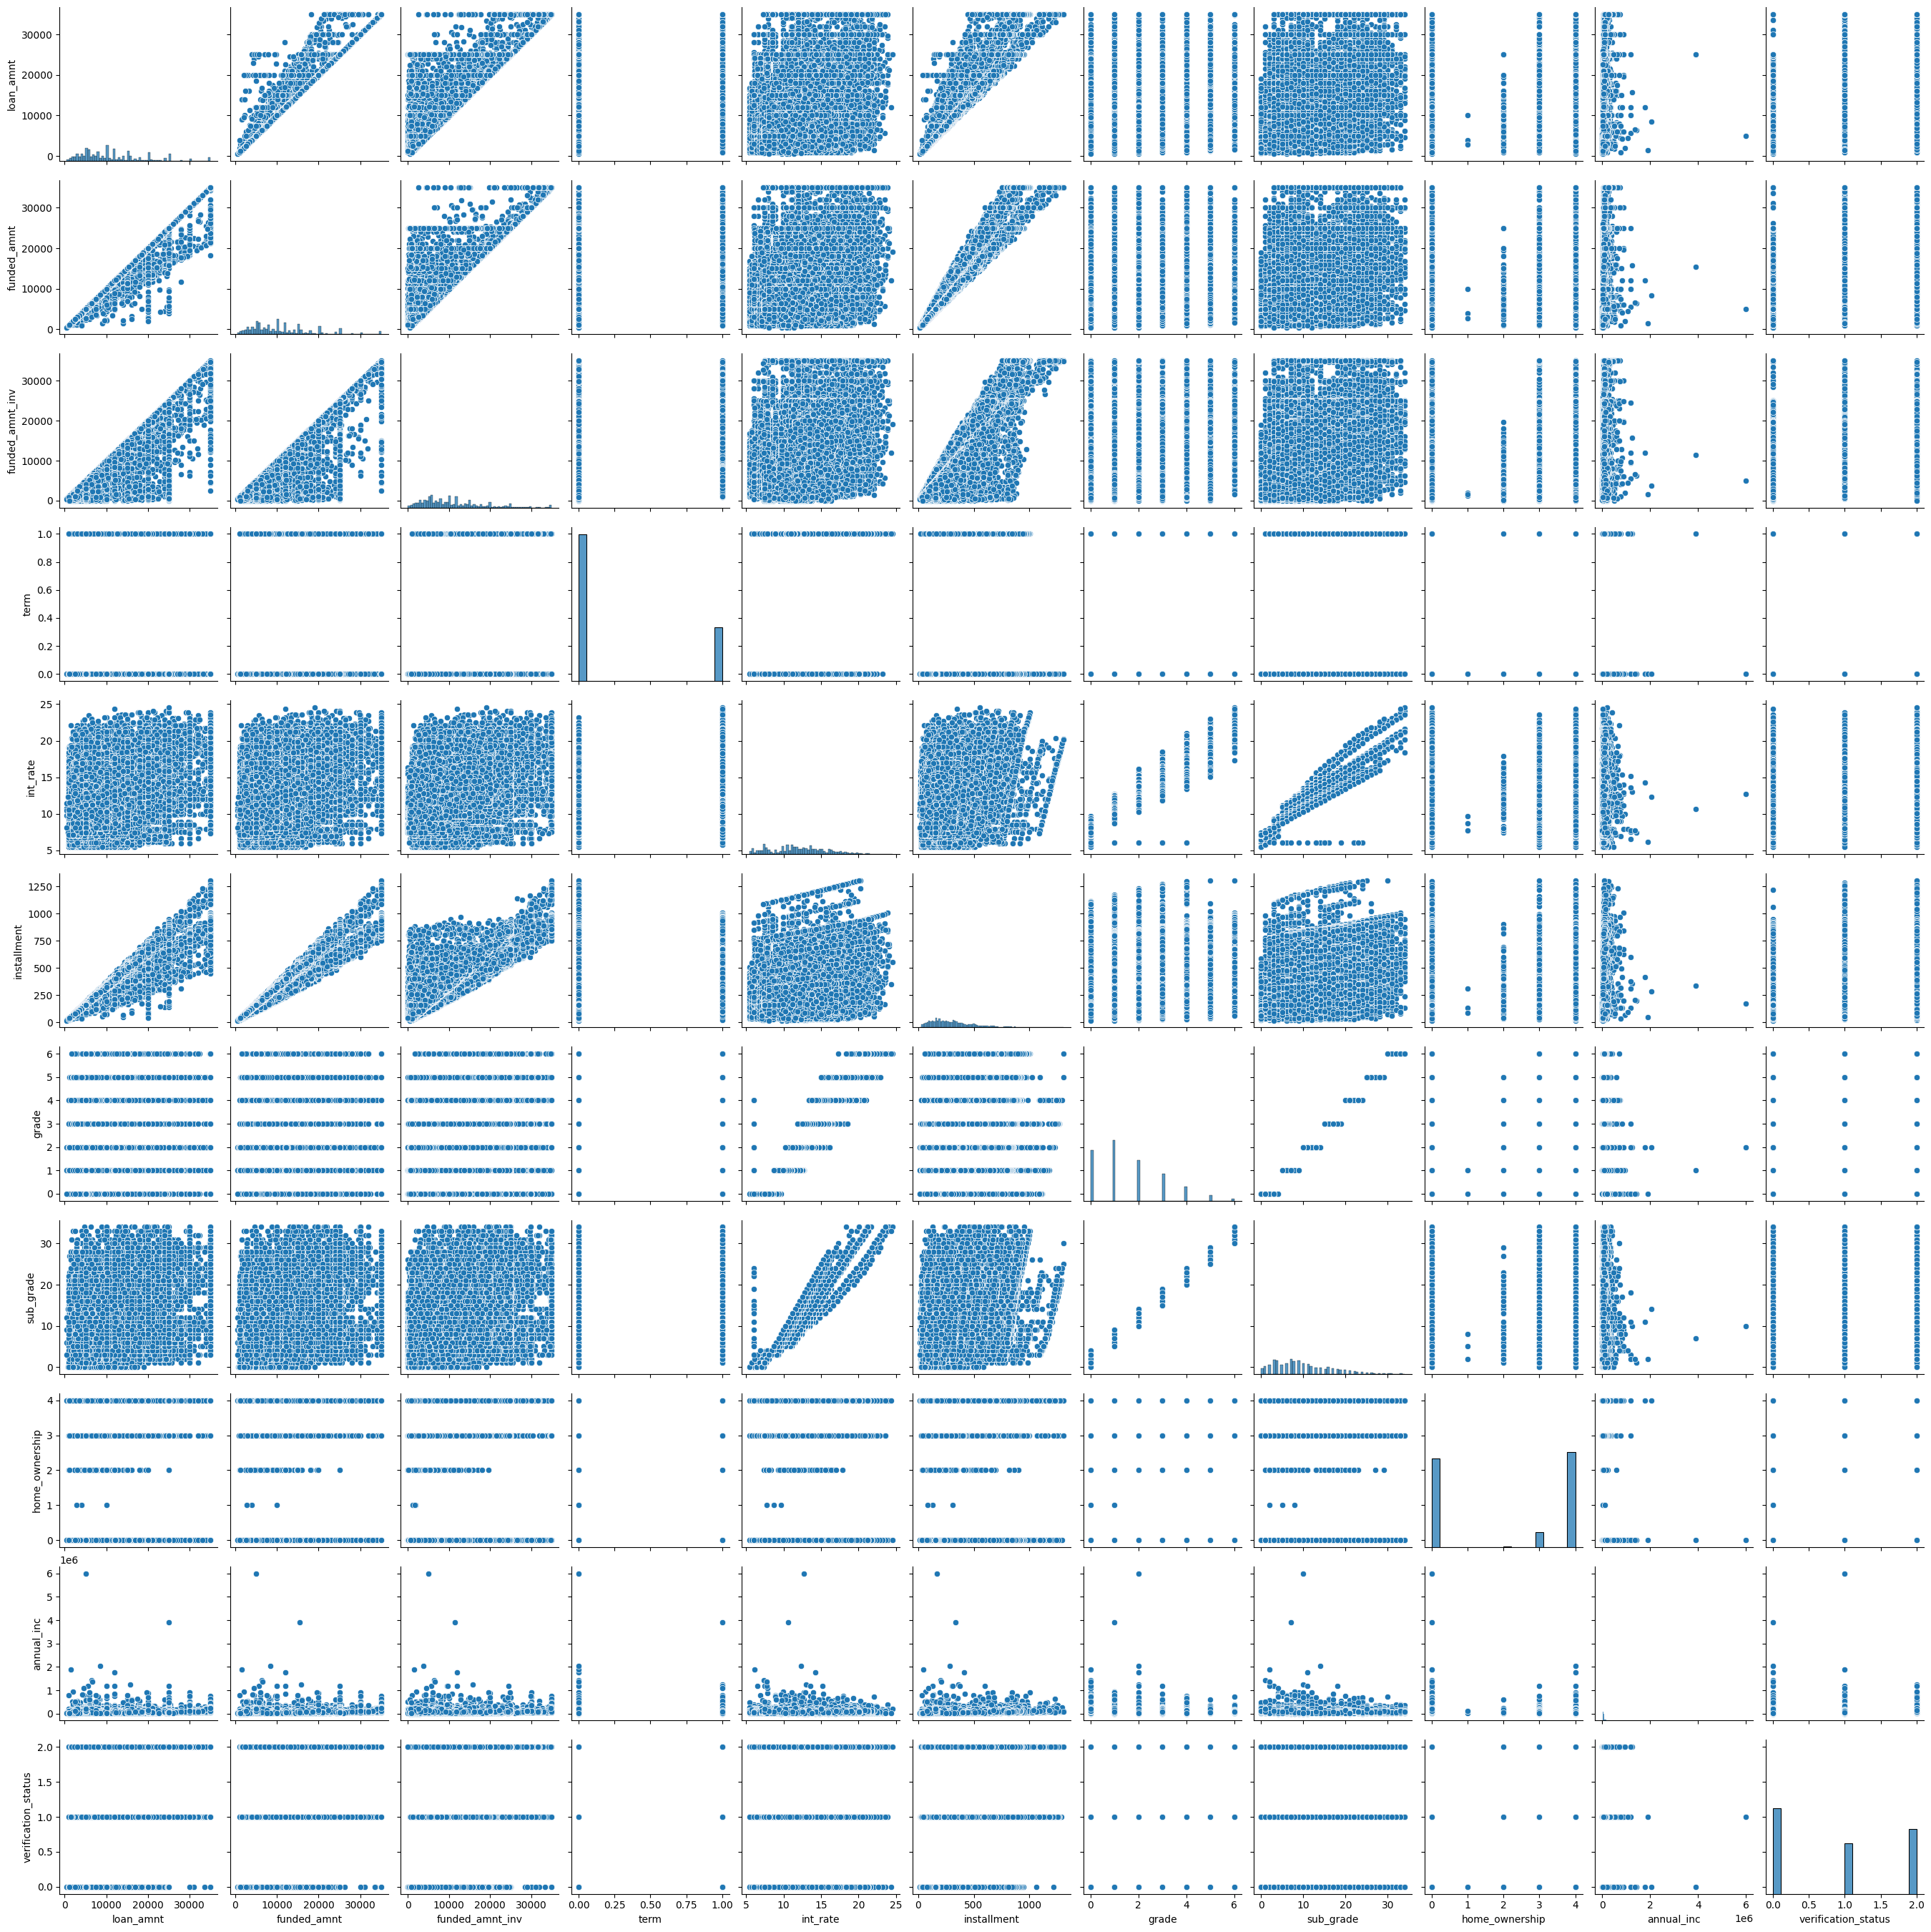

In [71]:
# Scatter plot between each possible pair of independent variable and also histogram for each independent variable 
sns.pairplot(loan) # Normal

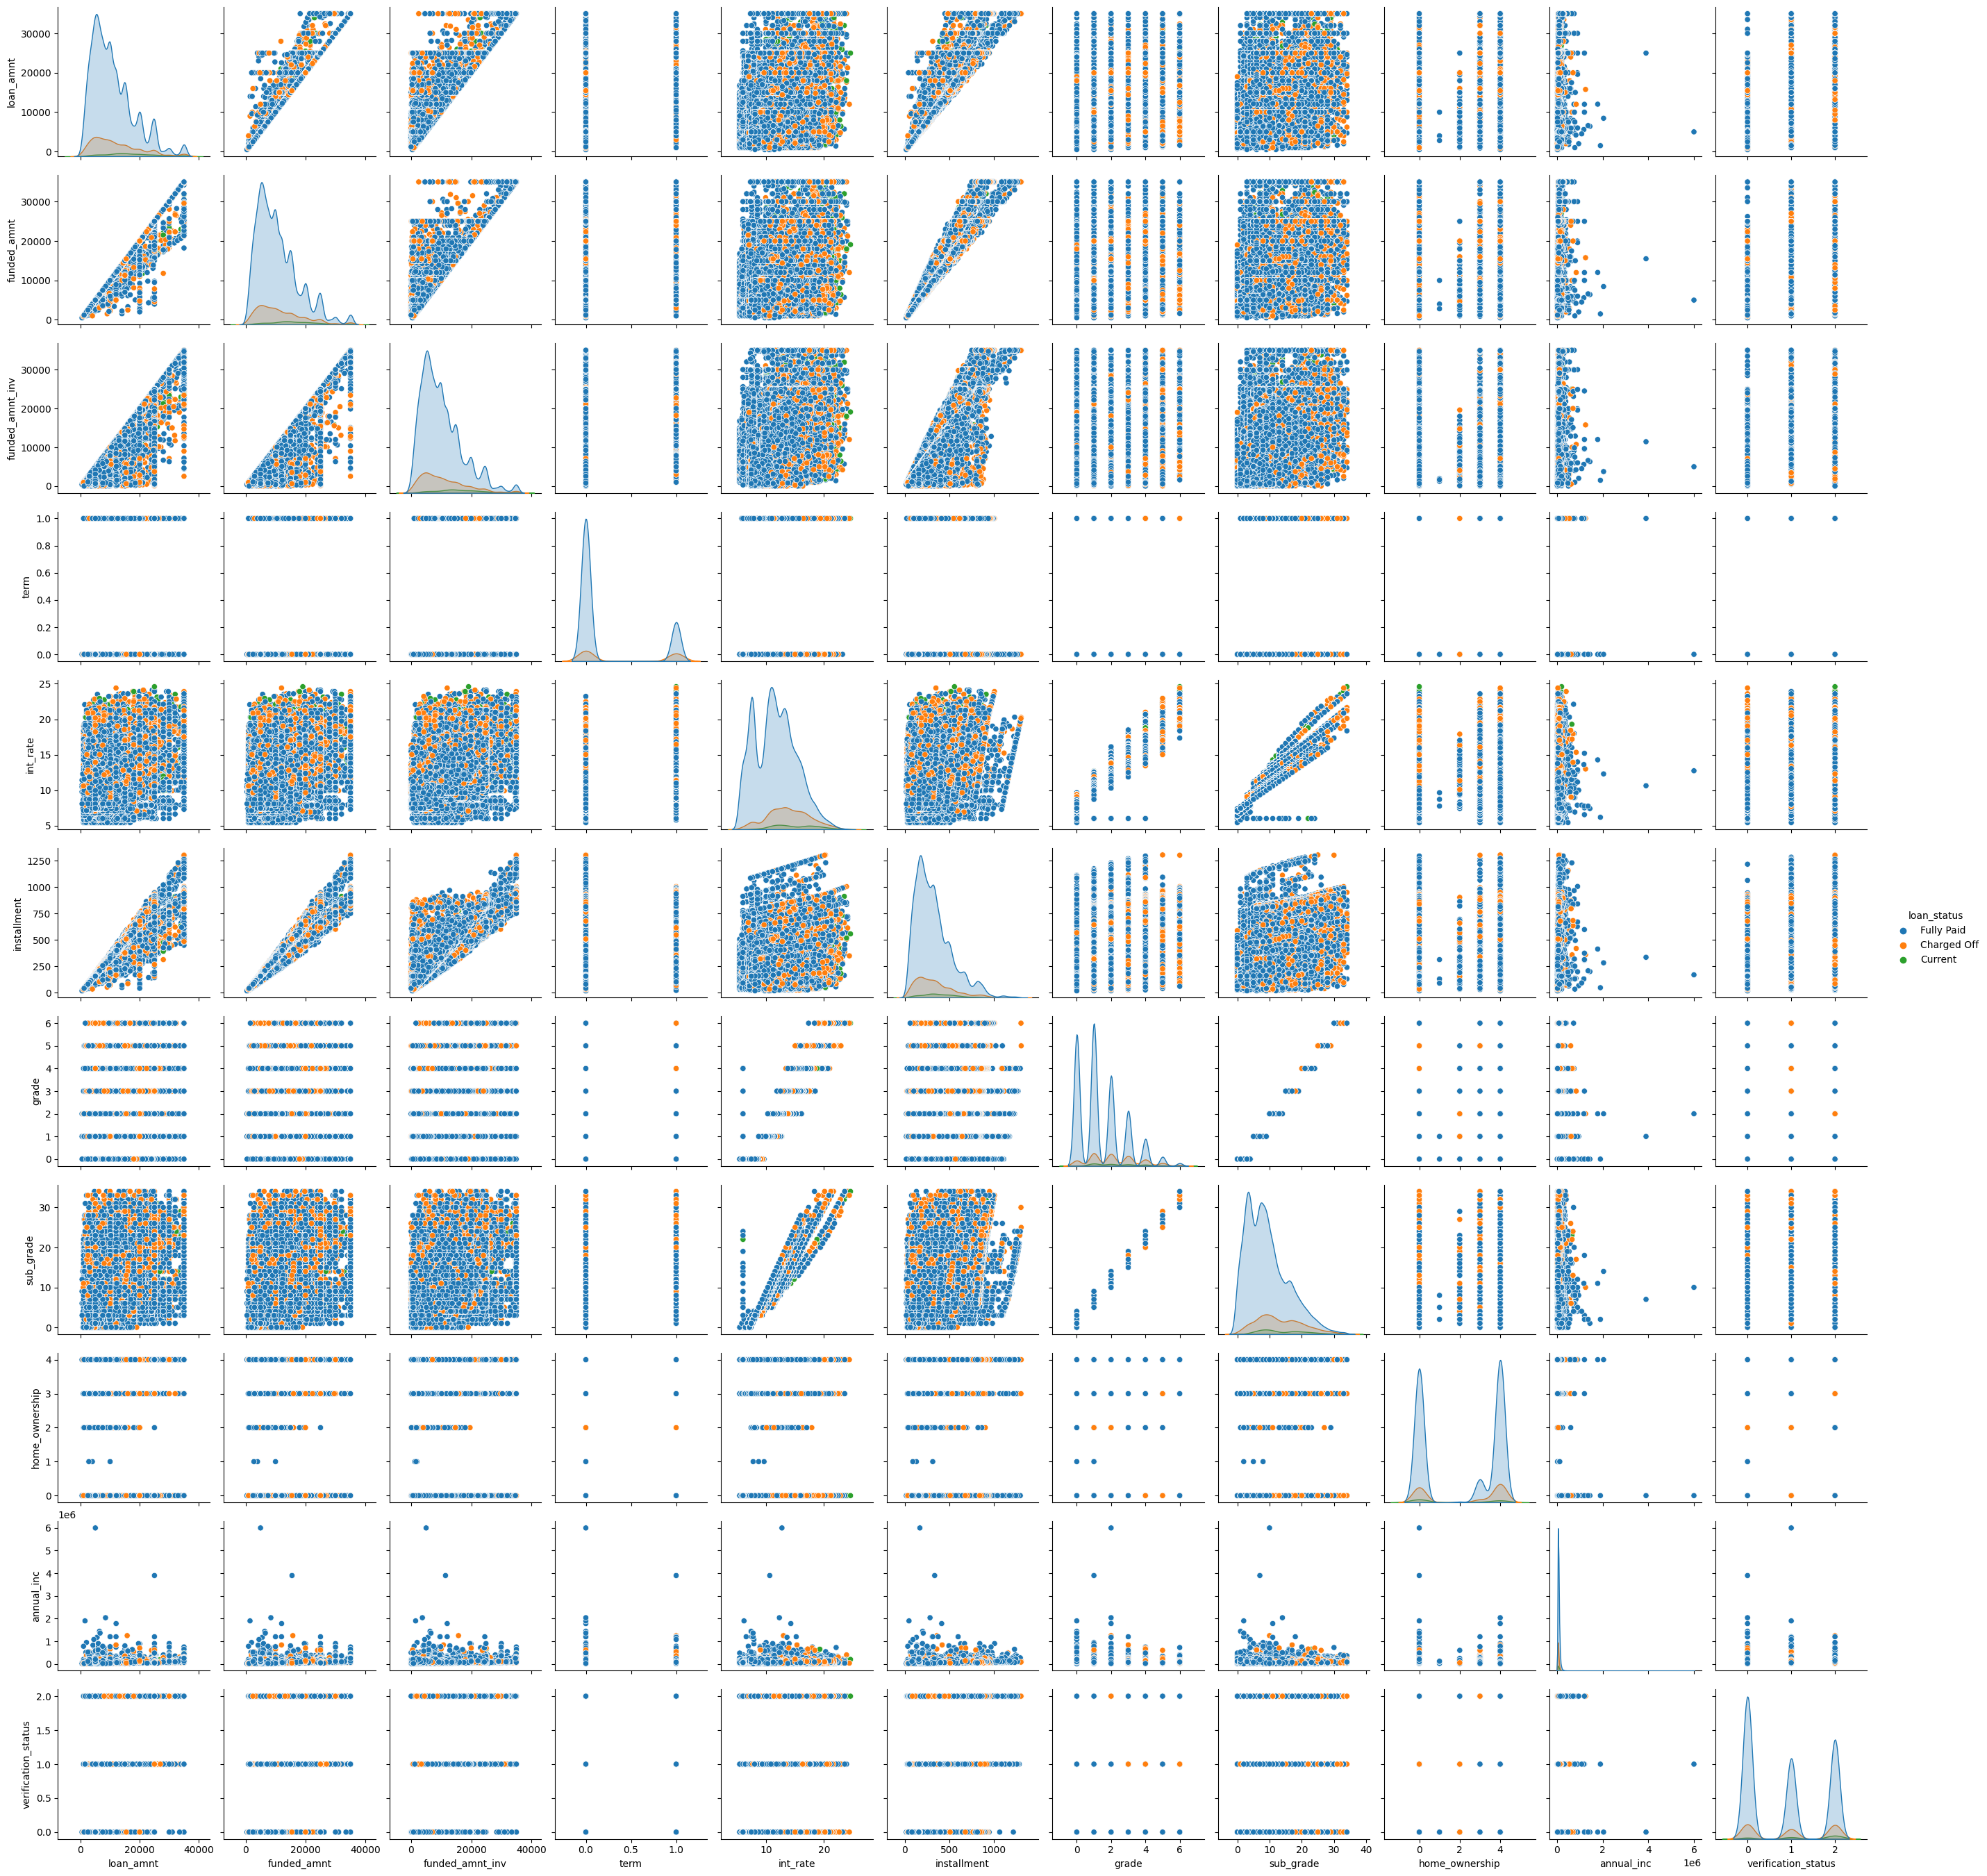

In [72]:
sns.pairplot(loan, hue = "loan_status") # With showing the category of each car choice in the scatter plot

In [73]:
# Correlation values between each independent features
loan.corr()

loan_amnt  funded_amnt  funded_amnt_inv      term  \
loan_amnt             1.000000     0.981578         0.940034  0.361036   
funded_amnt           0.981578     1.000000         0.958422  0.340510   
funded_amnt_inv       0.940034     0.958422         1.000000  0.360747   
term                  0.361036     0.340510         0.360747  1.000000   
int_rate              0.309415     0.312619         0.306657  0.451699   
installment           0.930288     0.956159         0.905039  0.101973   
grade                 0.290447     0.291034         0.268682  0.430900   
sub_grade             0.302329     0.301621         0.279219  0.441739   
home_ownership       -0.175968    -0.170489        -0.167500 -0.106522   
annual_inc            0.271149     0.266965         0.254375  0.046675   
verification_status   0.416186     0.409789         0.423062  0.257458   

                     int_rate  installment     grade  sub_grade  \
loan_amnt            0.309415     0.930288  0.290447   0.302329   
funded_amnt          0.312619     0.956159  0.291034   0.301621   
funded_amnt_inv      0.306657     0.905039  0.268682   0.279219   
term                 0.451699     0.101973  0.430900   0.441739   
int_rate             1.000000     0.282703  0.948627   0.961573   
installment          0.282703     1.000000  0.267104   0.276086   
grade                0.948627     0.267104  1.000000   0.979566   
sub_grade            0.961573     0.276086  0.979566   1.000000   
home_ownership       0.064337    -0.138246  0.054169   0.055989   
annual_inc           0.053185     0.270874  0.054913   0.056452   
verification_status  0.210899     0.361562  0.192740   0.200433   

                     home_ownership  annual_inc  verification_status  
loan_amnt                 -0.175968    0.271149             0.416186  
funded_amnt               -0.170489    0.266965             0.409789  
funded_amnt_inv           -0.167500    0.254375             0.423062  
term                      -0.106522    0.046675             0.257458  
int_rate                   0.064337    0.053185             0.210899  
installment               -0.138246    0.270874             0.361562  
grade                      0.054169    0.054913             0.192740  
sub_grade                  0.055989    0.056452             0.200433  
home_ownership             1.000000   -0.197778            -0.081519  
annual_inc                -0.197778    1.000000             0.125413  
verification_status       -0.081519    0.125413             1.000000

In [74]:
train, test = train_test_split(loan, test_size = 0.2)

In [75]:
# ‘multinomial’ option is supported only by the ‘lbfgs’ and ‘newton-cg’ solvers
model = LogisticRegression(multi_class = "multinomial", solver = "newton-cg").fit(train.iloc[:, :11], train.iloc[:, 11])

C:\Users\J. Berger Perkins\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [76]:
test_predict = model.predict(test.iloc[:, :11]) # Test predictions

In [77]:
# Test accuracy 
accuracy_score(test.iloc[:,11], test_predict)

0.8260322255790534

In [78]:
train_predict = model.predict(train.iloc[:, :11]) # Train predictions 

In [79]:
# Train accuracy 
accuracy_score(train.iloc[:,11], train_predict)

0.8307367890976616